Mehul Oswal<br>
Class: TE-4 (M-4)<br>
Roll No: 31444

# DSBDAL Assignment - 4
## Data Analytics I

### Importing Python Modules

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#%matplotlib inline:- to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written.
# r2_score :- (coefficient of determination) regression score function.
#mean_squared_error :- Mean squared error regression loss.

In [368]:
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

**Dataset:** https://github.com/selva86/datasets/blob/master/BostonHousing.csv
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per house
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 dollars
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s dollars

In [369]:
# loading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Data Preprocessing

In [370]:
print("There are " + str(df.shape[0]) + " records with " + str(df.shape[1]) + " features each.")

There are 506 records with 14 features each.


In [371]:
# displaying technical information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [372]:
# displaying statistical information of numerical fields in dataset

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [373]:
# number of null fields

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Graphical Representation

<AxesSubplot:>

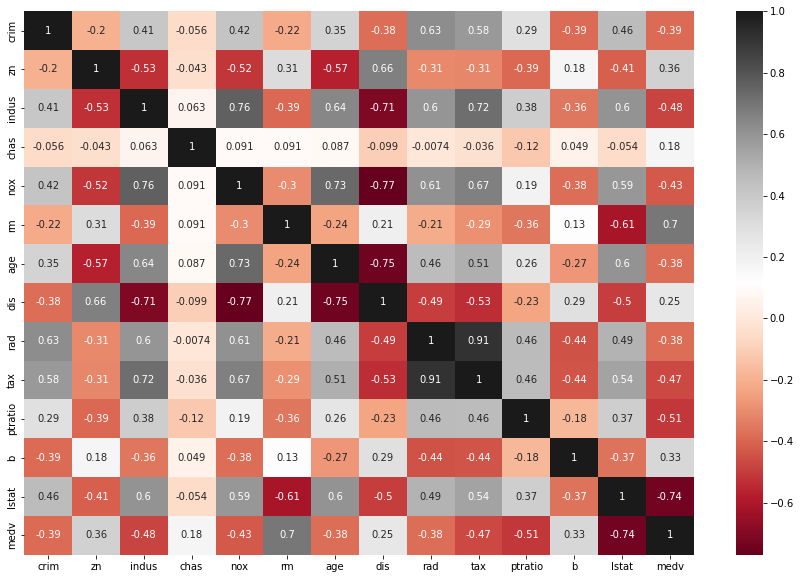

In [374]:
# Heatmap to find CORRELATION
#0 -> no correlation
#+ve -> directly proportional
#-ve -> inversely proportional
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), annot = True, cmap = "RdGy")

### Observations:
**indus**, **nox**, **rm**, **age**, **tax**, **ptratio**, **lstat** show better correlation with **medv** 

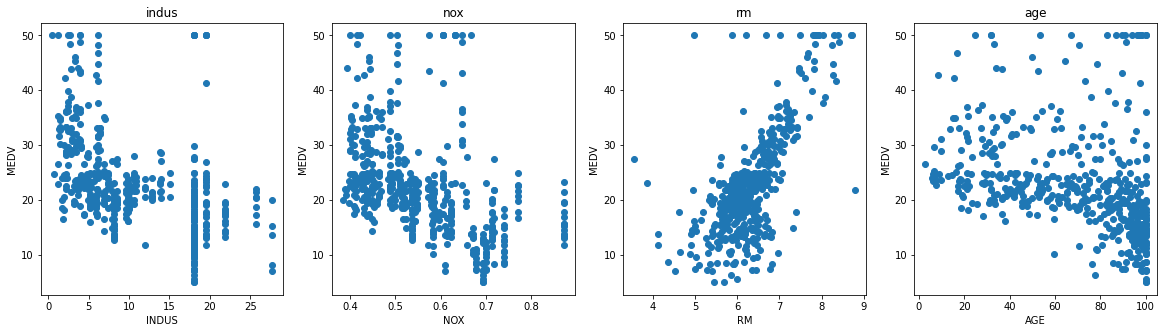

In [375]:
# scatter plot

plt.figure(figsize = (20, 5))

options = ["indus", "nox", "rm", "age"]
target = df["medv"]

for i, col in enumerate(options):
    plt.subplot(1, len(options) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col.upper())
    plt.ylabel("MEDV")

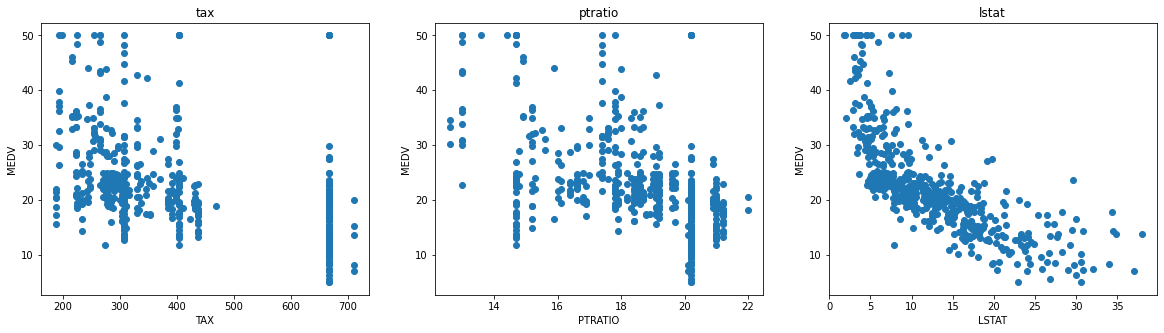

In [376]:
# scatter plot: To check CORRELATION as well

plt.figure(figsize = (20, 5))

options = ["tax", "ptratio", "lstat"]
target = df["medv"]

for i, col in enumerate(options):
    plt.subplot(1, len(options) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col.upper())
    plt.ylabel("MEDV")

In [377]:
dfc = df.copy()

### Boxplot to Detect Outliers

<AxesSubplot:xlabel='indus'>

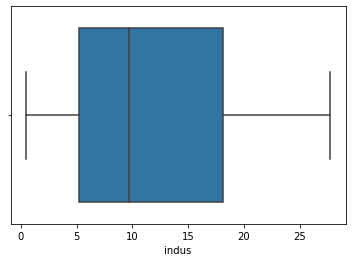

In [378]:
sns.boxplot(x = dfc['indus'])

<AxesSubplot:xlabel='nox'>

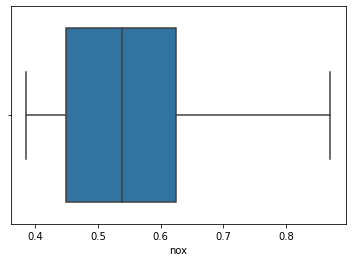

In [379]:
sns.boxplot(x = dfc['nox'])

<AxesSubplot:xlabel='rm'>

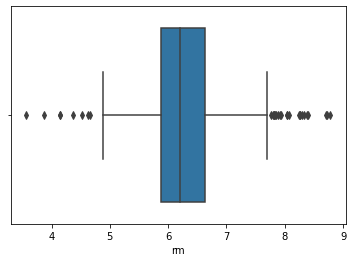

In [380]:
sns.boxplot(x = dfc['rm'])

<AxesSubplot:xlabel='age'>

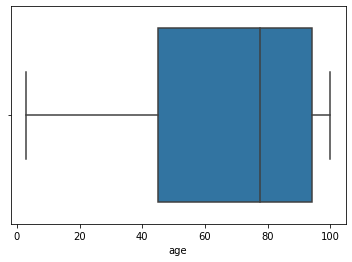

In [381]:
sns.boxplot(x = dfc['age'])

<AxesSubplot:xlabel='tax'>

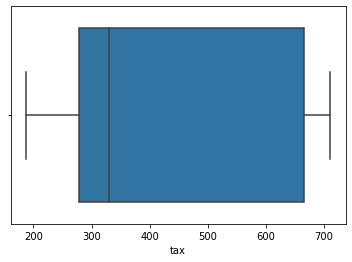

In [382]:
sns.boxplot(x = dfc['tax'])

<AxesSubplot:xlabel='ptratio'>

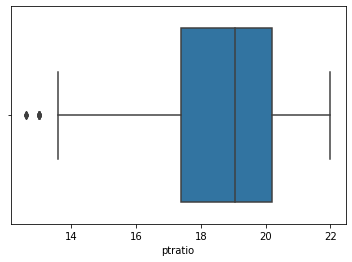

In [383]:
sns.boxplot(x = dfc['ptratio'])

<AxesSubplot:xlabel='lstat'>

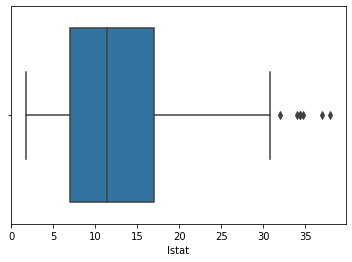

In [384]:
sns.boxplot(x = dfc['lstat'])

### Handling Outliers using Inter Quartile Range

In [385]:
# to calculate inter quartile range

from scipy import stats
_cols = ['lstat']
result = stats.iqr(dfc[_cols], axis = 0)
result

array([10.005])

In [386]:
# before removing outliers
dfc.shape

(506, 14)

In [387]:
# dropping records that contain outliers

dfc.drop(dfc[dfc['lstat'] > (dfc['lstat'].quantile(0.75) + 1.5 * result[0])].index, inplace = True)

In [388]:
# after removing outliers
dfc.shape

(499, 14)

<AxesSubplot:>

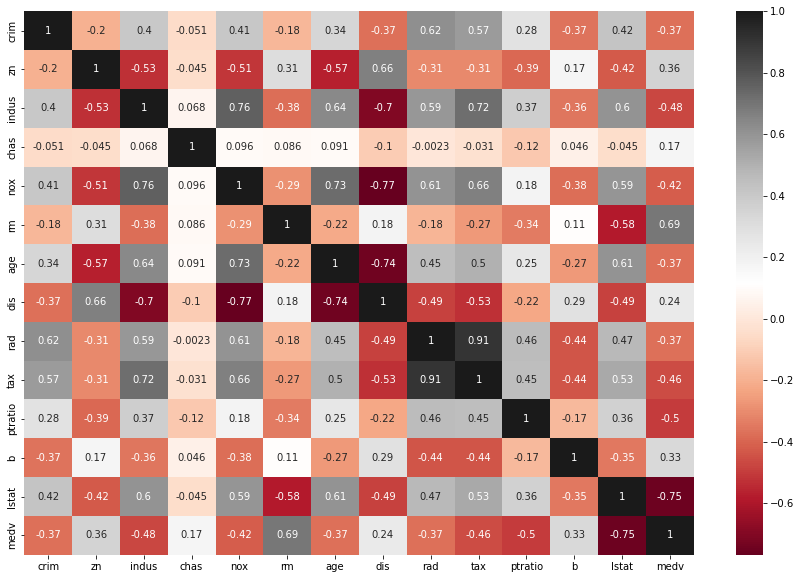

In [389]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = dfc.corr(), annot = True, cmap = "RdGy")
# annot -> to print values inside the sqaure

### Splitting the Dataset for Training & Testing

After removal of **outliers**, the correlation matrix displays better results.

In [390]:
# feature matrix
X = pd.DataFrame(np.c_[dfc["indus"], dfc["nox"], dfc["rm"], dfc["age"], dfc["tax"], dfc["ptratio"], dfc["lstat"]], columns = ["indus", "nox", "rm", "age", "tax", "ptratio", "lstat"])

# target variable
Y = dfc["medv"]

print("Feature Matrix X: \n", X)
print("\nTarget Variable Y:\n", Y)

Feature Matrix X: 
      indus    nox     rm   age    tax  ptratio  lstat
0     2.31  0.538  6.575  65.2  296.0     15.3   4.98
1     7.07  0.469  6.421  78.9  242.0     17.8   9.14
2     7.07  0.469  7.185  61.1  242.0     17.8   4.03
3     2.18  0.458  6.998  45.8  222.0     18.7   2.94
4     2.18  0.458  7.147  54.2  222.0     18.7   5.33
..     ...    ...    ...   ...    ...      ...    ...
494  11.93  0.573  6.593  69.1  273.0     21.0   9.67
495  11.93  0.573  6.120  76.7  273.0     21.0   9.08
496  11.93  0.573  6.976  91.0  273.0     21.0   5.64
497  11.93  0.573  6.794  89.3  273.0     21.0   6.48
498  11.93  0.573  6.030  80.8  273.0     21.0   7.88

[499 rows x 7 columns]

Target Variable Y:
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 499, dtype: float64


In [391]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(399, 7)
(100, 7)
(399,)
(100,)


### Training the Linear Regression Model

In [392]:
lin_reg_model = LinearRegression() #Using the ordinary Least Squares
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

### Testing the Model for Error & Accuracy

In [393]:
# model performance for training set
train_prediction = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, train_prediction)))
residual_error = (np.sqrt(mean_squared_error(Y_train,train_prediction))/np.sqrt(len(X_train)))
r2 = r2_score(Y_train, train_prediction) #(coefficient of determination) regression score function.

print("For training dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Residual Error is {}".format(residual_error))
print("Accuracy is {}%".format(r2 * 100))

# model performance for testing set
test_prediction = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, test_prediction)))
residual_error = (np.sqrt(mean_squared_error(Y_test,test_prediction))/np.sqrt(len(X_test)))
r2 = r2_score(Y_test, test_prediction)

print("\nFor testing dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Residual Error is {}".format(residual_error))
print("Accuracy is {}%".format(r2 * 100))

For training dataset:
Root Mean Square Error is 5.191650058154763
Residual Error is 0.2599075907031356
Accuracy is 68.64431543515799%

For testing dataset:
Root Mean Square Error is 4.149221462371583
Residual Error is 0.4149221462371583
Accuracy is 77.02415952526145%


Text(0, 0.5, 'Predicted Y')

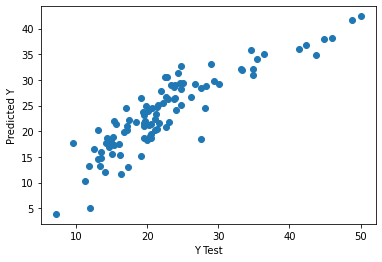

In [394]:
# Actual value VS Predicted value

plt.scatter(Y_test, test_prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

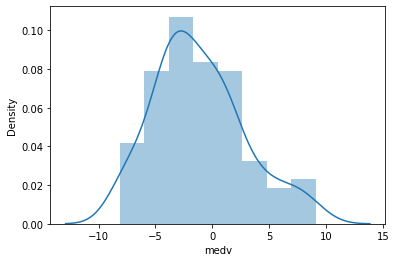

In [395]:
# Distribution plot for House Price

sns.distplot((Y_test - test_prediction));

In [396]:
# Parameters / Coefficients for Linear Regression Model

coefficients = pd.DataFrame(lin_reg_model.coef_, X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
indus,0.050012
nox,-2.337444
rm,3.893782
age,0.031107
tax,-0.002464
ptratio,-0.993278
lstat,-0.733613


### Trying to Improve Accuracy

Remove all the outliers in the dataset and check for accuracy

In [397]:
dft = df.copy()

<AxesSubplot:>

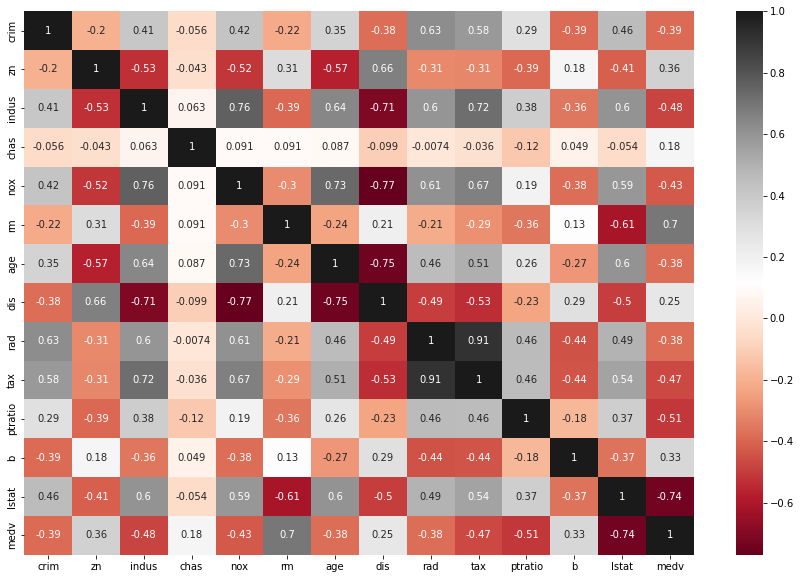

In [398]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = dft.corr(), annot = True, cmap = "RdGy")

<AxesSubplot:xlabel='medv'>

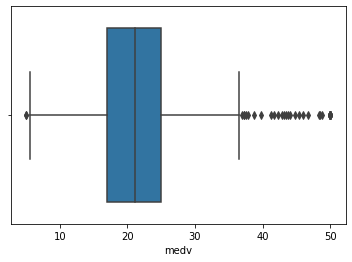

In [399]:
sns.boxplot(x = dft['medv'])

In [400]:
from scipy import stats
_cols = ['lstat', 'medv', 'ptratio', 'rm']
result = stats.iqr(dft[_cols], axis = 0)
result

array([10.005,  7.975,  2.8  ,  0.738])

In [401]:
dft.shape

(506, 14)

In [402]:
dft.drop(dft[dft['lstat'] > (dft['lstat'].quantile(0.75) + 1.5 * result[0])].index, inplace = True)
dft.drop(dft[dft['medv'] > (dft['medv'].quantile(0.75) + 1.5 * result[1])].index, inplace = True)
dft.drop(dft[dft['ptratio'] < (dft['ptratio'].quantile(0.25) - 1.5 * result[2])].index, inplace = True)
dft.drop(dft[dft['rm'] > (dft['rm'].quantile(0.75) + 1.5 * result[3])].index, inplace = True)
dft.drop(dft[dft['rm'] < (dft['rm'].quantile(0.25) - 1.5 * result[3])].index, inplace = True)

In [403]:
dft.shape

(444, 14)

<AxesSubplot:>

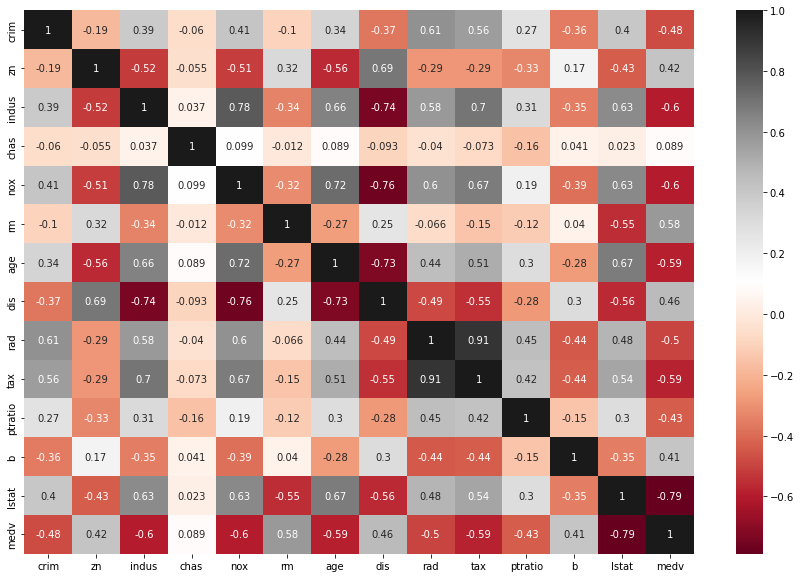

In [404]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = dft.corr(), annot = True, cmap = "RdGy")

In [405]:
X = dft[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
Y = dft["medv"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5) #random_state simply sets seed to the random generator, 
                                                                                            # so that your train-test splits are always deterministic.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print()
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)


# model performance for training set
train_prediction = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, train_prediction)))
residual_error = (np.sqrt(mean_squared_error(Y_train,train_prediction))/np.sqrt(len(X_train)))
r2 = r2_score(Y_train, train_prediction)

print("For training dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Residual Error is {}".format(residual_error))
print("Accuracy is {}%".format(r2 * 100))

# model performance for testing set
test_prediction = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, test_prediction)))
residual_error = (np.sqrt(mean_squared_error(Y_test,test_prediction))/np.sqrt(len(X_test)))
r2 = r2_score(Y_test, test_prediction)

print("\nFor testing dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Residual Error is {}".format(residual_error))
print("Accuracy is {}%".format(r2 * 100))

(355, 12)
(89, 12)
(355,)
(89,)

For training dataset:
Root Mean Square Error is 2.8674641395521103
Residual Error is 0.15218919463057262
Accuracy is 79.07913582538792%

For testing dataset:
Root Mean Square Error is 3.0133028220379647
Residual Error is 0.3194094603177425
Accuracy is 74.82068387610576%
